In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib

In [2]:
df = pd.read_csv('/mydata/hand32/data/twitter/cluster10.sort', sep=',', 
                  names=['timestamp', 'key', 'key_size', 'value_size', 'client_id', 'op', 'ttl'])


In [3]:
df.columns

Index(['timestamp', 'key', 'key_size', 'value_size', 'client_id', 'op', 'ttl'], dtype='object')

In [8]:
print(len(df['client_id'].unique().tolist()))

16445


In [13]:
print(len(df['key'].unique().tolist()))

69561281


In [9]:
vcs = df.timestamp.value_counts().sort_index(ascending=True)

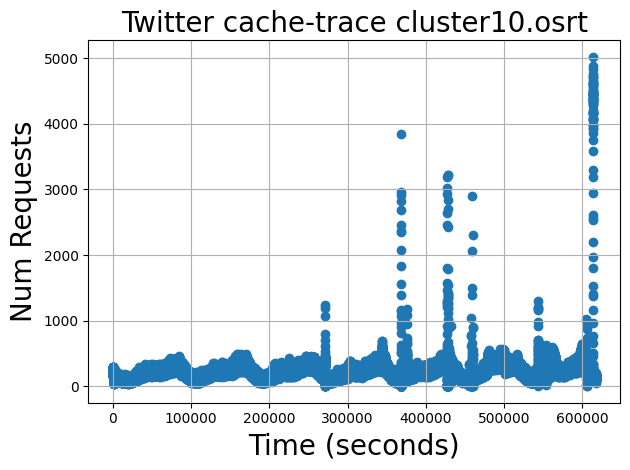

In [10]:
plt.scatter(vcs.index.tolist(), vcs.tolist())
plt.title("Twitter cache-trace cluster10.osrt", fontsize=20)
plt.xlabel("Time (seconds)", fontsize=20)       
plt.ylabel("Num Requests", fontsize=20)
plt.grid()
plt.tight_layout()

In [12]:
print(600000/3600.0/24)

6.944444444444444


In [14]:
df['timestamp'].max()

617069

In [21]:
max_uniq_key = len(df[df.timestamp == 0]['key'].unique().tolist())

In [22]:
max_client_id = len(df[df.timestamp == 0]['client_id'].unique().tolist())

In [20]:
df[df.timestamp == 0]

,timestamp,key,key_size,value_size,client_id,op,ttl
0,0,Nz_ztyiQKzKtmmKzQKyqim,22,3183,24106,add,7200
1,0,Nz_ztyiQKzKzqnimnCmmzK,22,0,24344,get,0
2,0,Nz_ztyiQKzKzqnqCqqqiKi,22,0,30766,get,0
3,0,Nz_ztyiQKzKzqnimnCmmzK,22,30,27656,add,7200
4,0,Nz_ztyiQKzKzqnqCqqqiKi,22,30,30766,add,7200
...,...,...,...,...,...,...,...
161,0,Nz_ztyiQKzKtitCyyQQmym,22,3180,24972,add,7200
162,0,Nz_ztyiQKzKtiiQntqKmKy,22,0,23458,get,0
163,0,Nz_ztyiQKzKttKyQtqimQK,22,0,25584,get,0
164,0,Nz_ztyiQKzKtiiQntqKmKy,22,3210,23688,add,7200


In [4]:
import threading

def tf(name, ndf, tsm):
    max_uniq_key = 0
    max_client_id = 0

    print(f"{name}: {int(tsm/64)*name} {int(tsm/64)}")
    for i in range(int(tsm/64)*name, (int(tsm/64)*name)+2):
        max_uniq_key = max(max_uniq_key, len(df[df.timestamp == i]['key'].unique().tolist()))
        max_client_id = max(max_client_id, len(df[df.timestamp == i]['client_id'].unique().tolist()))
    
    print(f"{name}: max_uniq_key={max_uniq_key}, max_client_id={max_client_id}")

ncpus=64
threads = list()
for index in range(ncpus):
    x = threading.Thread(target=tf, args=(index,df,df['timestamp'].max()))
    threads.append(x)
    x.start()

for index, thread in enumerate(threads):
    thread.join()
    #print("Main    : thread %d done", index)  
print("DONE")

0: 0 9641
1: 9641 9641
2: 19282 9641
3: 28923 9641
4: 38564 9641
5: 48205 9641
6: 57846 9641
7: 67487 9641
8: 77128 9641
0: max_uniq_key=131, max_client_id=237
3: max_uniq_key=79, max_client_id=149
9: 86769 9641
1: max_uniq_key=51, max_client_id=96
4: max_uniq_key=111, max_client_id=210
10: 96410 9641
5: max_uniq_key=92, max_client_id=166
2: max_uniq_key=51, max_client_id=101
6: max_uniq_key=112, max_client_id=204
11: 106051 9641
12: 115692 9641
7: max_uniq_key=147, max_client_id=270
8: max_uniq_key=161, max_client_id=292
13: 125333 9641
9: max_uniq_key=140, max_client_id=260
14: 134974 9641
15: 144615 9641
10: max_uniq_key=94, max_client_id=178
16: 154256 9641
11: max_uniq_key=49, max_client_id=97
17: 163897 9641
18: 173538 9641
13: max_uniq_key=97, max_client_id=181
12: max_uniq_key=70, max_client_id=132
19: 183179 9641
14: max_uniq_key=116, max_client_id=215
15: max_uniq_key=129, max_client_id=236
20: 192820 9641
21: 202461 9641
17: max_uniq_key=189, max_client_id=347
22: 212102 964

In [35]:
#617069
print(607383+9641)

617024
